In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import numpy as np
import astropy.units as u
from jscon import make_image as mk
from jscon import make_stars 
from jscon import parameter_load
import scipy.integrate as integrate
from scipy import interpolate
import importlib
importlib.reload(mk)

para_file = "../params/para_yajiri.dat"
dic_params = parameter_load.load_params(para_file )
n_core = int(dic_params["n_core"])
diameter = dic_params["diameter"] 
lambda_now = dic_params["lambda_now"]* 10**-6
sigma_ace = dic_params["sigma_ace"]
pix_arcsec = dic_params["pix_arcsec"]                  
time_ref = dic_params["time_ref"]   
time_start = dic_params["time_start"]  
time_end = dic_params["time_end"]  
time_sample_num = dic_params["time_sample_num"]  
sky_dir_l = dic_params["sky_dir_l"] -180
sky_dir_b = dic_params["sky_dir_b"]  
xmax = int(dic_params["xmax"] )
ymax = int(dic_params["ymax"] )
file_catalog = str(dic_params["catalog"])
file_catalog_for_random_stars = "../data/stellar_catalog.csv"

## compute std for beam 
sigma_pix = mk.compute_sigma(lambda_now, diameter, sigma_ace, pix_arcsec)
## Compute 1d Gaussina PSF
gauss_conv = mk.compute_espf_for_gaussian_psf(sigma_pix)

Make image based on ../data/ibnorth.csv

/home/aizwms/anaconda3/envs/hzlc_clone/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


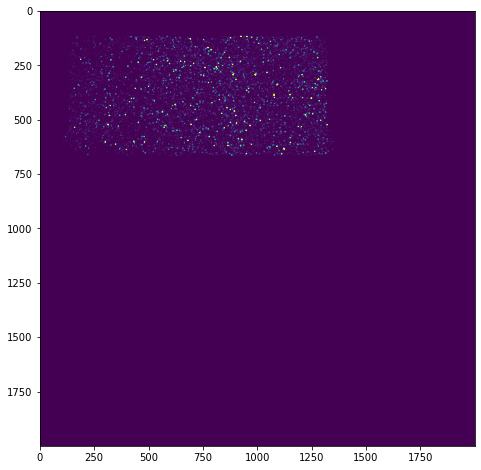

In [53]:
df_input = mk.get_catalog_info_for_making_stars(file_catalog)
gal_l_input, gal_b_input, hwmag_input, hwmag_targets_input = mk.get_gal_l_gal_b_hwmag(df_input)
pixel_targets_input = mk.make_pixel_coordinates(gal_l_input, gal_b_input, sky_dir_l, sky_dir_b, pix_arcsec)
image_input, mask_included = mk.make_image(pixel_targets_input, hwmag_targets_input, gauss_conv,  xmax, ymax)

percen = np.percentile(image_input, (1, 99.9))
fig = plt.figure(figsize = (15, 8))
plt.imshow(image_input, vmin = percen[0], vmax = percen[1])

Make random stars following distribution in ../data/ibnorth.csv

In [46]:
### Define regions where random stars are put. Stellar density is same as input catalog
wd = 0.4
gal_l_min = sky_dir_l  
gal_l_max = sky_dir_l +wd  
gal_b_min = sky_dir_b 
gal_b_max =sky_dir_b + wd 
##
make_stars.make_new_stars(gal_l_min, gal_l_max, gal_b_min, gal_b_max, \
               gal_l_input, gal_b_input , hwmag_input, out_file = file_catalog_for_random_stars )

,ra,dec,hwmag,gal_l,gal_b
0,87.231996,29.205788,16.801635,180.143843,0.757934
1,87.190998,29.076945,19.495677,180.235829,0.660863
2,87.140433,29.204039,16.127617,180.104149,0.688542
3,87.123587,29.388456,16.672543,179.938560,0.771069
4,87.014719,29.303549,19.368988,179.962297,0.645962
...,...,...,...,...,...
391354,86.970445,29.268347,19.224450,179.972480,0.594712
391355,87.354812,29.229228,19.133806,180.178909,0.861905
391356,87.111910,29.127289,17.853752,180.157056,0.627615
391357,87.265159,29.322276,17.051035,180.058873,0.842717


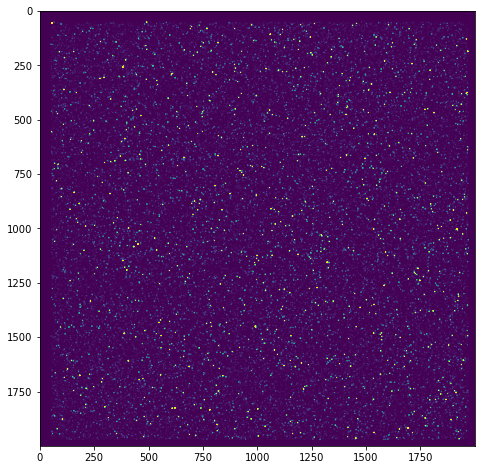

In [54]:
try:
    df = mk.get_catalog_info_for_making_stars(file_catalog_for_random_stars)
except:
    df = mk.get_catalog_info(file_catalog_for_random_stars)
gal_l_random, gal_b_random, hwmag_random, hwmag_targets_random = mk.get_gal_l_gal_b_hwmag(df,minus_l = False)
pixel_targets_random = mk.make_pixel_coordinates(gal_l_random, gal_b_random, sky_dir_l, sky_dir_b, pix_arcsec)
image_random, mask_included = mk.make_image(pixel_targets_random, hwmag_targets_random, gauss_conv,  xmax, ymax)

fig = plt.figure(figsize = (15, 8))
plt.imshow(image_random, vmin = percen[0], vmax = percen[1])
np.save("../test_image/test_image", image_random)

In [31]:
pixel_targets_random

[array([-1618617.51889107, -1618341.60011236, -1619782.7490799 , ...,
        -1617642.41159566, -1618361.06314117, -1618473.53960928]),
 array([2348.61782863, 1497.22874848, 2431.83673714, ...,  550.17174357,
         410.49611962, 2427.79966103])]